In [145]:
import pandas as pd
import numpy as np
from IPython.core import display as ICD

In [24]:
df = pd.read_excel("New_Data.xlsx",sheet_name="Data")
#ได้ทำการ convert Label ต่างๆเป็น Value แทนเพื่อใช้ในการวิเคราะห์

In [25]:
df.head(3)

,Timestamp,คุณเกิดวันที่เท่าไหร่,AGE,เพศ,อาหารญี่ปุ่น,อาหารจึน,อาหารไทย,อาหารอีสาน,อาหารสุขภาพ,บุฟเฟต์,...,ความถี่ Content ด้านบันเทิง,ความถี่ Content เกี่่ยวกับเกมส์,ความถี่ Content เกี่ยวกับการ review ร้านอาหาร,ความถี่ Content เกี่ยวกับการท่องเที่ยว,ความถี่ Content เกี่ยวกับการแต่งบ้าน,ความถี่ Content เกี่ยวกับการโทรทัศน์,ความถี่ Content เกี่ยวกับละคร,ความถี่ Content เกี่ยวกับการเมือง,ความสนใจอื่นๆ,Kmeans
0,2021-01-09 10:07:27.365,1988-09-19,33,ชาย,1,1,3,2,1,1,...,1,2,3,3,3,3,3,5,"กีฬา UFC, Soccer",2
1,2021-01-09 10:07:34.010,1993-08-10,28,หญิง,2,0,3,2,1,2,...,2,3,5,5,4,1,1,4,กีฬา สัตว์เลี้ยง เทคโนโลยี,2
2,2021-01-09 10:07:35.902,1993-11-07,28,ชาย,3,0,2,1,0,3,...,5,5,5,3,3,3,1,5,-,0


In [99]:
df_age_ok = df[df["AGE"] > 0 ].iloc[:,2:4]
df_age_nok = df[df["AGE"] == 0 ]

In [27]:
df_age_nok

,Timestamp,คุณเกิดวันที่เท่าไหร่,AGE,เพศ,อาหารญี่ปุ่น,อาหารจึน,อาหารไทย,อาหารอีสาน,อาหารสุขภาพ,บุฟเฟต์,...,ความถี่ Content ด้านบันเทิง,ความถี่ Content เกี่่ยวกับเกมส์,ความถี่ Content เกี่ยวกับการ review ร้านอาหาร,ความถี่ Content เกี่ยวกับการท่องเที่ยว,ความถี่ Content เกี่ยวกับการแต่งบ้าน,ความถี่ Content เกี่ยวกับการโทรทัศน์,ความถี่ Content เกี่ยวกับละคร,ความถี่ Content เกี่ยวกับการเมือง,ความสนใจอื่นๆ,Kmeans
13,2021-01-09 10:08:35.650,2021-01-09,0,ชาย,3,-1,2,2,1,3,...,4,5,3,1,0,1,0,5,การออมเงิน,0


# Know about students

<ipython-input-74-acedac2d67f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_df["Gender"] = np.where(gender_df["เพศ"]=="ชาย","Male",np.where(gender_df["เพศ"]=="หญิง","Female","Unknown"))


<AxesSubplot:xlabel='Gender'>

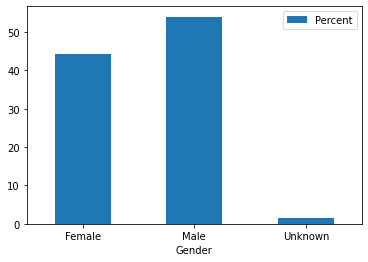

In [74]:
gender_df = df[["เพศ"]]
gender_df["Gender"] = np.where(gender_df["เพศ"]=="ชาย","Male",np.where(gender_df["เพศ"]=="หญิง","Female","Unknown"))
group_gender = gender_df.groupby("Gender").count().rename({"เพศ":"Count"},axis=1).reset_index()
#.plot.bar(x='Gender', y='Count', rot=0)
group_gender["Percent"] = round((group_gender["Count"]/group_gender.sum()["Count"])*100,1)
group_gender.plot.bar(x='Gender', y='Percent', rot=0)

In [82]:
print(f'Age average in this class -> {df_age_ok.mean()}')

Age average in this class -> 31.0


In [101]:
df_age_ok
df_age_ok["Gender"] = np.where(df_age_ok["เพศ"]=="ชาย","Male",np.where(df_age_ok["เพศ"]=="หญิง","Female","Unknown"))

<AxesSubplot:xlabel='Gender'>

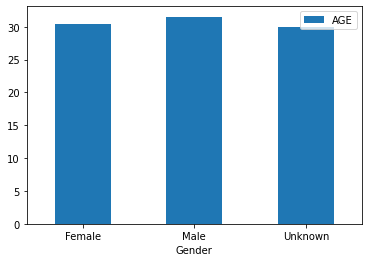

In [108]:
df_age_ok.groupby("Gender").mean().reset_index().plot.bar(x='Gender', y='AGE', rot=0)

In [113]:
ls_like = ['อาหารญี่ปุ่น',
       'อาหารจึน', 'อาหารไทย', 'อาหารอีสาน', 'อาหารสุขภาพ', 'บุฟเฟต์',
       'ชาบูชาบู', 'ปิ้งย่าง', 'เหล้าเบียร์', 'เสื้อผ้าแฟชั่น', 'แต่งหน้า',
       'skincare บำรุงผิว', 'การออกกำลังกาย', 'การเล่นเกมส์', 'การท่องเที่ยว',
       'การอ่านหนังสือ', 'การอ่านบทความ Online', 'การเรียน e-learning',
       'ดู Series', 'ดูหนัง', 'ดู Youtube', 'ดู Netflix',
       'Content ด้านบันเทิง', 'Content เกี่่ยวกับเกมส์',
       'Content เกี่ยวกับการ review ร้านอาหาร',
       'Content เกี่ยวกับการท่องเที่ยว', 'Content เกี่ยวกับการแต่งบ้าน',
       'Content เกี่ยวกับการโทรทัศน์', 'Content เกี่ยวกับละคร',
       'Content เกี่ยวกับการเมือง']
ls_freq = ['ความถี่ อาหารญี่ปุ่น', 'ความถี่ อาหารจึน',
       'ความถี่ อาหารไทย', 'ความถี่ อาหารอีสาน', 'ความถี่ อาหารสุขภาพ',
       'ความถี่ บุฟเฟต์', 'ความถี่ ชาบูชาบู', 'ความถี่ ปิ้งย่าง',
       'ความถี่ เหล้าเบียร์', 'ความถี่ เสื้อผ้าแฟชั่น', 'ความถี่ แต่งหน้า',
       'ความถี่ skincare บำรุงผิว', 'ความถี่ การออกกำลังกาย',
       'ความถี่ การเล่นเกมส์', 'ความถี่ การท่องเที่ยว',
       'ความถี่ การอ่านหนังสือ', 'ความถี่ การอ่านบทความ Online',
       'ความถี่ การเรียน e-learning', 'ความถี่ ดู Series', 'ความถี่ ดูหนัง',
       'ความถี่ ดู Youtube', 'ความถี่ ดู Netflix',
       'ความถี่ Content ด้านบันเทิง', 'ความถี่ Content เกี่่ยวกับเกมส์',
       'ความถี่ Content เกี่ยวกับการ review ร้านอาหาร',
       'ความถี่ Content เกี่ยวกับการท่องเที่ยว',
       'ความถี่ Content เกี่ยวกับการแต่งบ้าน',
       'ความถี่ Content เกี่ยวกับการโทรทัศน์', 'ความถี่ Content เกี่ยวกับละคร',
       'ความถี่ Content เกี่ยวกับการเมือง']

In [133]:
print()
print("----------- Most Interest categories score of Students in this class -----------")
df[ls_like].mean().reset_index().rename({0:"Interest"},axis=1).sort_values("Interest",ascending=False).iloc[:10]


----------- Most Interest categories score of Students in this class -----------


,index,Interest
0,อาหารญี่ปุ่น,2.079365
14,การท่องเที่ยว,2.031746
19,ดูหนัง,1.714286
21,ดู Netflix,1.698413
6,ชาบูชาบู,1.682540
2,อาหารไทย,1.634921
7,ปิ้งย่าง,1.603175
20,ดู Youtube,1.603175
18,ดู Series,1.587302
25,Content เกี่ยวกับการท่องเที่ยว,1.460317


In [134]:
print()
print("----------- Most often categories score of Students in this class -----------")
df[ls_freq].mean().reset_index().rename({0:"Freq"},axis=1).sort_values("Freq",ascending=False).iloc[:10]


----------- Most often categories score of Students in this class -----------


,index,Freq
2,ความถี่ อาหารไทย,4.714286
20,ความถี่ ดู Youtube,4.492063
16,ความถี่ การอ่านบทความ Online,3.920635
21,ความถี่ ดู Netflix,3.349206
3,ความถี่ อาหารอีสาน,3.206349
29,ความถี่ Content เกี่ยวกับการเมือง,3.190476
18,ความถี่ ดู Series,3.174603
15,ความถี่ การอ่านหนังสือ,3.174603
17,ความถี่ การเรียน e-learning,3.126984
12,ความถี่ การออกกำลังกาย,3.063492


In [154]:
all_ls = []
all_ls.extend(ls_like)
all_ls.extend(ls_freq)

In [155]:
df_cor_like_tab = df[ls_like]
df_cor_freq_tab = df[ls_freq]

In [158]:
df_cor_like = df_cor_like_tab.corr().reset_index()
df_cor_freq = df_cor_freq_tab.corr().reset_index()

In [159]:
for i in ls_like :
    ICD.display(df_cor_like[["index",i]].sort_values(i,ascending=False).head(5))

,index,อาหารญี่ปุ่น
0,อาหารญี่ปุ่น,1.000000
6,ชาบูชาบู,0.565748
24,Content เกี่ยวกับการ review ร้านอาหาร,0.492472
5,บุฟเฟต์,0.419898
25,Content เกี่ยวกับการท่องเที่ยว,0.326259


,index,อาหารจึน
1,อาหารจึน,1.000000
28,Content เกี่ยวกับละคร,0.256343
17,การเรียน e-learning,0.190193
4,อาหารสุขภาพ,0.184708
0,อาหารญี่ปุ่น,0.183296


,index,อาหารไทย
2,อาหารไทย,1.000000
3,อาหารอีสาน,0.587620
28,Content เกี่ยวกับละคร,0.368052
22,Content ด้านบันเทิง,0.358933
17,การเรียน e-learning,0.312424


,index,อาหารอีสาน
3,อาหารอีสาน,1.000000
2,อาหารไทย,0.587620
9,เสื้อผ้าแฟชั่น,0.388254
20,ดู Youtube,0.272805
4,อาหารสุขภาพ,0.272640


,index,อาหารสุขภาพ
4,อาหารสุขภาพ,1.000000
12,การออกกำลังกาย,0.356954
17,การเรียน e-learning,0.308598
3,อาหารอีสาน,0.272640
11,skincare บำรุงผิว,0.266950


,index,บุฟเฟต์
5,บุฟเฟต์,1.000000
6,ชาบูชาบู,0.708651
7,ปิ้งย่าง,0.569601
0,อาหารญี่ปุ่น,0.419898
24,Content เกี่ยวกับการ review ร้านอาหาร,0.354044


,index,ชาบูชาบู
6,ชาบูชาบู,1.000000
5,บุฟเฟต์,0.708651
7,ปิ้งย่าง,0.630016
0,อาหารญี่ปุ่น,0.565748
24,Content เกี่ยวกับการ review ร้านอาหาร,0.426675


,index,ปิ้งย่าง
7,ปิ้งย่าง,1.000000
6,ชาบูชาบู,0.630016
5,บุฟเฟต์,0.569601
24,Content เกี่ยวกับการ review ร้านอาหาร,0.354671
0,อาหารญี่ปุ่น,0.291514


,index,เหล้าเบียร์
8,เหล้าเบียร์,1.000000
29,Content เกี่ยวกับการเมือง,0.342130
14,การท่องเที่ยว,0.253452
5,บุฟเฟต์,0.243643
7,ปิ้งย่าง,0.242458


,index,เสื้อผ้าแฟชั่น
9,เสื้อผ้าแฟชั่น,1.000000
10,แต่งหน้า,0.590786
11,skincare บำรุงผิว,0.457828
3,อาหารอีสาน,0.388254
28,Content เกี่ยวกับละคร,0.330839


,index,แต่งหน้า
10,แต่งหน้า,1.000000
11,skincare บำรุงผิว,0.726883
9,เสื้อผ้าแฟชั่น,0.590786
28,Content เกี่ยวกับละคร,0.543797
22,Content ด้านบันเทิง,0.456906


,index,skincare บำรุงผิว
11,skincare บำรุงผิว,1.000000
10,แต่งหน้า,0.726883
9,เสื้อผ้าแฟชั่น,0.457828
28,Content เกี่ยวกับละคร,0.314468
4,อาหารสุขภาพ,0.266950


,index,การออกกำลังกาย
12,การออกกำลังกาย,1.000000
4,อาหารสุขภาพ,0.356954
14,การท่องเที่ยว,0.328948
13,การเล่นเกมส์,0.296886
27,Content เกี่ยวกับการโทรทัศน์,0.291790


,index,การเล่นเกมส์
13,การเล่นเกมส์,1.000000
23,Content เกี่่ยวกับเกมส์,0.805294
29,Content เกี่ยวกับการเมือง,0.340720
12,การออกกำลังกาย,0.296886
21,ดู Netflix,0.267375


,index,การท่องเที่ยว
14,การท่องเที่ยว,1.000000
25,Content เกี่ยวกับการท่องเที่ยว,0.690634
27,Content เกี่ยวกับการโทรทัศน์,0.473983
26,Content เกี่ยวกับการแต่งบ้าน,0.452458
12,การออกกำลังกาย,0.328948


,index,การอ่านหนังสือ
15,การอ่านหนังสือ,1.000000
16,การอ่านบทความ Online,0.764398
17,การเรียน e-learning,0.376813
4,อาหารสุขภาพ,0.264369
29,Content เกี่ยวกับการเมือง,0.246557


,index,การอ่านบทความ Online
16,การอ่านบทความ Online,1.000000
15,การอ่านหนังสือ,0.764398
17,การเรียน e-learning,0.397807
29,Content เกี่ยวกับการเมือง,0.276156
25,Content เกี่ยวกับการท่องเที่ยว,0.262262


,index,การเรียน e-learning
17,การเรียน e-learning,1.000000
29,Content เกี่ยวกับการเมือง,0.413636
16,การอ่านบทความ Online,0.397807
15,การอ่านหนังสือ,0.376813
20,ดู Youtube,0.346430


,index,ดู Series
18,ดู Series,1.000000
21,ดู Netflix,0.700209
19,ดูหนัง,0.664786
27,Content เกี่ยวกับการโทรทัศน์,0.504695
28,Content เกี่ยวกับละคร,0.467560


,index,ดูหนัง
19,ดูหนัง,1.000000
18,ดู Series,0.664786
21,ดู Netflix,0.565243
27,Content เกี่ยวกับการโทรทัศน์,0.544371
20,ดู Youtube,0.471298


,index,ดู Youtube
20,ดู Youtube,1.000000
19,ดูหนัง,0.471298
21,ดู Netflix,0.414540
25,Content เกี่ยวกับการท่องเที่ยว,0.371805
27,Content เกี่ยวกับการโทรทัศน์,0.369419


,index,ดู Netflix
21,ดู Netflix,1.000000
18,ดู Series,0.700209
19,ดูหนัง,0.565243
20,ดู Youtube,0.414540
28,Content เกี่ยวกับละคร,0.394151


,index,Content ด้านบันเทิง
22,Content ด้านบันเทิง,1.000000
28,Content เกี่ยวกับละคร,0.725700
27,Content เกี่ยวกับการโทรทัศน์,0.591559
25,Content เกี่ยวกับการท่องเที่ยว,0.474077
10,แต่งหน้า,0.456906


,index,Content เกี่่ยวกับเกมส์
23,Content เกี่่ยวกับเกมส์,1.000000
13,การเล่นเกมส์,0.805294
29,Content เกี่ยวกับการเมือง,0.394138
21,ดู Netflix,0.353113
20,ดู Youtube,0.337548


,index,Content เกี่ยวกับการ review ร้านอาหาร
24,Content เกี่ยวกับการ review ร้านอาหาร,1.000000
25,Content เกี่ยวกับการท่องเที่ยว,0.623982
0,อาหารญี่ปุ่น,0.492472
28,Content เกี่ยวกับละคร,0.435447
22,Content ด้านบันเทิง,0.429524


,index,Content เกี่ยวกับการท่องเที่ยว
25,Content เกี่ยวกับการท่องเที่ยว,1.000000
14,การท่องเที่ยว,0.690634
26,Content เกี่ยวกับการแต่งบ้าน,0.634111
24,Content เกี่ยวกับการ review ร้านอาหาร,0.623982
27,Content เกี่ยวกับการโทรทัศน์,0.525717


,index,Content เกี่ยวกับการแต่งบ้าน
26,Content เกี่ยวกับการแต่งบ้าน,1.000000
25,Content เกี่ยวกับการท่องเที่ยว,0.634111
27,Content เกี่ยวกับการโทรทัศน์,0.497815
14,การท่องเที่ยว,0.452458
19,ดูหนัง,0.425089


,index,Content เกี่ยวกับการโทรทัศน์
27,Content เกี่ยวกับการโทรทัศน์,1.000000
28,Content เกี่ยวกับละคร,0.764217
22,Content ด้านบันเทิง,0.591559
19,ดูหนัง,0.544371
25,Content เกี่ยวกับการท่องเที่ยว,0.525717


,index,Content เกี่ยวกับละคร
28,Content เกี่ยวกับละคร,1.000000
27,Content เกี่ยวกับการโทรทัศน์,0.764217
22,Content ด้านบันเทิง,0.725700
10,แต่งหน้า,0.543797
25,Content เกี่ยวกับการท่องเที่ยว,0.474759


,index,Content เกี่ยวกับการเมือง
29,Content เกี่ยวกับการเมือง,1.000000
17,การเรียน e-learning,0.413636
23,Content เกี่่ยวกับเกมส์,0.394138
27,Content เกี่ยวกับการโทรทัศน์,0.382644
8,เหล้าเบียร์,0.342130


In [160]:
for i in ls_freq :
    ICD.display(df_cor_freq[["index",i]].sort_values(i,ascending=False).head(5))

,index,ความถี่ อาหารญี่ปุ่น
0,ความถี่ อาหารญี่ปุ่น,1.000000
6,ความถี่ ชาบูชาบู,0.553200
5,ความถี่ บุฟเฟต์,0.452719
7,ความถี่ ปิ้งย่าง,0.363131
24,ความถี่ Content เกี่ยวกับการ review ร้านอาหาร,0.339288


,index,ความถี่ อาหารจึน
1,ความถี่ อาหารจึน,1.000000
6,ความถี่ ชาบูชาบู,0.295660
0,ความถี่ อาหารญี่ปุ่น,0.201019
7,ความถี่ ปิ้งย่าง,0.190619
19,ความถี่ ดูหนัง,0.174797


,index,ความถี่ อาหารไทย
2,ความถี่ อาหารไทย,1.000000
8,ความถี่ เหล้าเบียร์,0.142392
12,ความถี่ การออกกำลังกาย,0.124647
24,ความถี่ Content เกี่ยวกับการ review ร้านอาหาร,0.124639
29,ความถี่ Content เกี่ยวกับการเมือง,0.119378


,index,ความถี่ อาหารอีสาน
3,ความถี่ อาหารอีสาน,1.000000
4,ความถี่ อาหารสุขภาพ,0.301185
9,ความถี่ เสื้อผ้าแฟชั่น,0.256849
0,ความถี่ อาหารญี่ปุ่น,0.255596
29,ความถี่ Content เกี่ยวกับการเมือง,0.230956


,index,ความถี่ อาหารสุขภาพ
4,ความถี่ อาหารสุขภาพ,1.000000
12,ความถี่ การออกกำลังกาย,0.490575
14,ความถี่ การท่องเที่ยว,0.346806
3,ความถี่ อาหารอีสาน,0.301185
25,ความถี่ Content เกี่ยวกับการท่องเที่ยว,0.266012


,index,ความถี่ บุฟเฟต์
5,ความถี่ บุฟเฟต์,1.000000
6,ความถี่ ชาบูชาบู,0.684628
7,ความถี่ ปิ้งย่าง,0.459750
0,ความถี่ อาหารญี่ปุ่น,0.452719
24,ความถี่ Content เกี่ยวกับการ review ร้านอาหาร,0.327226


,index,ความถี่ ชาบูชาบู
6,ความถี่ ชาบูชาบู,1.000000
5,ความถี่ บุฟเฟต์,0.684628
0,ความถี่ อาหารญี่ปุ่น,0.553200
7,ความถี่ ปิ้งย่าง,0.483526
24,ความถี่ Content เกี่ยวกับการ review ร้านอาหาร,0.355820


,index,ความถี่ ปิ้งย่าง
7,ความถี่ ปิ้งย่าง,1.000000
6,ความถี่ ชาบูชาบู,0.483526
5,ความถี่ บุฟเฟต์,0.459750
0,ความถี่ อาหารญี่ปุ่น,0.363131
25,ความถี่ Content เกี่ยวกับการท่องเที่ยว,0.303351


,index,ความถี่ เหล้าเบียร์
8,ความถี่ เหล้าเบียร์,1.000000
29,ความถี่ Content เกี่ยวกับการเมือง,0.317360
12,ความถี่ การออกกำลังกาย,0.274732
19,ความถี่ ดูหนัง,0.259106
26,ความถี่ Content เกี่ยวกับการแต่งบ้าน,0.254167


,index,ความถี่ เสื้อผ้าแฟชั่น
9,ความถี่ เสื้อผ้าแฟชั่น,1.000000
10,ความถี่ แต่งหน้า,0.566956
11,ความถี่ skincare บำรุงผิว,0.493854
22,ความถี่ Content ด้านบันเทิง,0.405331
26,ความถี่ Content เกี่ยวกับการแต่งบ้าน,0.402500


,index,ความถี่ แต่งหน้า
10,ความถี่ แต่งหน้า,1.000000
11,ความถี่ skincare บำรุงผิว,0.673674
9,ความถี่ เสื้อผ้าแฟชั่น,0.566956
28,ความถี่ Content เกี่ยวกับละคร,0.431110
22,ความถี่ Content ด้านบันเทิง,0.354756


,index,ความถี่ skincare บำรุงผิว
11,ความถี่ skincare บำรุงผิว,1.000000
10,ความถี่ แต่งหน้า,0.673674
9,ความถี่ เสื้อผ้าแฟชั่น,0.493854
28,ความถี่ Content เกี่ยวกับละคร,0.345356
26,ความถี่ Content เกี่ยวกับการแต่งบ้าน,0.201358


,index,ความถี่ การออกกำลังกาย
12,ความถี่ การออกกำลังกาย,1.000000
4,ความถี่ อาหารสุขภาพ,0.490575
14,ความถี่ การท่องเที่ยว,0.364130
25,ความถี่ Content เกี่ยวกับการท่องเที่ยว,0.363920
26,ความถี่ Content เกี่ยวกับการแต่งบ้าน,0.318820


,index,ความถี่ การเล่นเกมส์
13,ความถี่ การเล่นเกมส์,1.000000
23,ความถี่ Content เกี่่ยวกับเกมส์,0.747001
12,ความถี่ การออกกำลังกาย,0.288093
24,ความถี่ Content เกี่ยวกับการ review ร้านอาหาร,0.265017
18,ความถี่ ดู Series,0.211854


,index,ความถี่ การท่องเที่ยว
14,ความถี่ การท่องเที่ยว,1.000000
25,ความถี่ Content เกี่ยวกับการท่องเที่ยว,0.575483
27,ความถี่ Content เกี่ยวกับการโทรทัศน์,0.390801
24,ความถี่ Content เกี่ยวกับการ review ร้านอาหาร,0.388855
12,ความถี่ การออกกำลังกาย,0.364130


,index,ความถี่ การอ่านหนังสือ
15,ความถี่ การอ่านหนังสือ,1.000000
16,ความถี่ การอ่านบทความ Online,0.436844
27,ความถี่ Content เกี่ยวกับการโทรทัศน์,0.330084
17,ความถี่ การเรียน e-learning,0.251568
12,ความถี่ การออกกำลังกาย,0.231324


,index,ความถี่ การอ่านบทความ Online
16,ความถี่ การอ่านบทความ Online,1.000000
15,ความถี่ การอ่านหนังสือ,0.436844
29,ความถี่ Content เกี่ยวกับการเมือง,0.294884
12,ความถี่ การออกกำลังกาย,0.205599
25,ความถี่ Content เกี่ยวกับการท่องเที่ยว,0.170602


,index,ความถี่ การเรียน e-learning
17,ความถี่ การเรียน e-learning,1.000000
27,ความถี่ Content เกี่ยวกับการโทรทัศน์,0.427042
28,ความถี่ Content เกี่ยวกับละคร,0.401446
15,ความถี่ การอ่านหนังสือ,0.251568
29,ความถี่ Content เกี่ยวกับการเมือง,0.186949


,index,ความถี่ ดู Series
18,ความถี่ ดู Series,1.000000
21,ความถี่ ดู Netflix,0.707700
19,ความถี่ ดูหนัง,0.377987
23,ความถี่ Content เกี่่ยวกับเกมส์,0.308990
13,ความถี่ การเล่นเกมส์,0.211854


,index,ความถี่ ดูหนัง
19,ความถี่ ดูหนัง,1.000000
21,ความถี่ ดู Netflix,0.484679
18,ความถี่ ดู Series,0.377987
14,ความถี่ การท่องเที่ยว,0.262052
8,ความถี่ เหล้าเบียร์,0.259106


,index,ความถี่ ดู Youtube
20,ความถี่ ดู Youtube,1.000000
23,ความถี่ Content เกี่่ยวกับเกมส์,0.299414
24,ความถี่ Content เกี่ยวกับการ review ร้านอาหาร,0.206613
13,ความถี่ การเล่นเกมส์,0.192119
17,ความถี่ การเรียน e-learning,0.167002


,index,ความถี่ ดู Netflix
21,ความถี่ ดู Netflix,1.000000
18,ความถี่ ดู Series,0.707700
19,ความถี่ ดูหนัง,0.484679
23,ความถี่ Content เกี่่ยวกับเกมส์,0.308182
0,ความถี่ อาหารญี่ปุ่น,0.258592


,index,ความถี่ Content ด้านบันเทิง
22,ความถี่ Content ด้านบันเทิง,1.000000
24,ความถี่ Content เกี่ยวกับการ review ร้านอาหาร,0.448336
28,ความถี่ Content เกี่ยวกับละคร,0.418049
9,ความถี่ เสื้อผ้าแฟชั่น,0.405331
27,ความถี่ Content เกี่ยวกับการโทรทัศน์,0.404792


,index,ความถี่ Content เกี่่ยวกับเกมส์
23,ความถี่ Content เกี่่ยวกับเกมส์,1.000000
13,ความถี่ การเล่นเกมส์,0.747001
18,ความถี่ ดู Series,0.308990
21,ความถี่ ดู Netflix,0.308182
24,ความถี่ Content เกี่ยวกับการ review ร้านอาหาร,0.299582


,index,ความถี่ Content เกี่ยวกับการ review ร้านอาหาร
24,ความถี่ Content เกี่ยวกับการ review ร้านอาหาร,1.000000
25,ความถี่ Content เกี่ยวกับการท่องเที่ยว,0.688201
26,ความถี่ Content เกี่ยวกับการแต่งบ้าน,0.466232
27,ความถี่ Content เกี่ยวกับการโทรทัศน์,0.456060
22,ความถี่ Content ด้านบันเทิง,0.448336


,index,ความถี่ Content เกี่ยวกับการท่องเที่ยว
25,ความถี่ Content เกี่ยวกับการท่องเที่ยว,1.000000
24,ความถี่ Content เกี่ยวกับการ review ร้านอาหาร,0.688201
26,ความถี่ Content เกี่ยวกับการแต่งบ้าน,0.611209
14,ความถี่ การท่องเที่ยว,0.575483
27,ความถี่ Content เกี่ยวกับการโทรทัศน์,0.461420


,index,ความถี่ Content เกี่ยวกับการแต่งบ้าน
26,ความถี่ Content เกี่ยวกับการแต่งบ้าน,1.000000
25,ความถี่ Content เกี่ยวกับการท่องเที่ยว,0.611209
27,ความถี่ Content เกี่ยวกับการโทรทัศน์,0.503450
24,ความถี่ Content เกี่ยวกับการ review ร้านอาหาร,0.466232
9,ความถี่ เสื้อผ้าแฟชั่น,0.402500


,index,ความถี่ Content เกี่ยวกับการโทรทัศน์
27,ความถี่ Content เกี่ยวกับการโทรทัศน์,1.000000
28,ความถี่ Content เกี่ยวกับละคร,0.814394
26,ความถี่ Content เกี่ยวกับการแต่งบ้าน,0.503450
25,ความถี่ Content เกี่ยวกับการท่องเที่ยว,0.461420
24,ความถี่ Content เกี่ยวกับการ review ร้านอาหาร,0.456060


,index,ความถี่ Content เกี่ยวกับละคร
28,ความถี่ Content เกี่ยวกับละคร,1.000000
27,ความถี่ Content เกี่ยวกับการโทรทัศน์,0.814394
10,ความถี่ แต่งหน้า,0.431110
22,ความถี่ Content ด้านบันเทิง,0.418049
24,ความถี่ Content เกี่ยวกับการ review ร้านอาหาร,0.402118


,index,ความถี่ Content เกี่ยวกับการเมือง
29,ความถี่ Content เกี่ยวกับการเมือง,1.000000
27,ความถี่ Content เกี่ยวกับการโทรทัศน์,0.422315
8,ความถี่ เหล้าเบียร์,0.317360
16,ความถี่ การอ่านบทความ Online,0.294884
7,ความถี่ ปิ้งย่าง,0.289264
